In [42]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import( confusion_matrix, classification_report, roc_curve, roc_auc_score)

from imblearn.under_sampling import RandomUnderSampler

In [43]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [44]:
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [16]:
X = df.drop('Class', axis =1 )
Y = df['Class']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_scaled, Y)

print(pd.Series(y_resampled).value_counts())


Class
0    492
1    492
Name: count, dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split( X_resampled,y_resampled, test_size=0.2,random_state=42,stratify=y_resampled)
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())


Class
1    394
0    393
Name: count, dtype: int64
Class
0    99
1    98
Name: count, dtype: int64


In [32]:
knn = KNeighborsClassifier( n_neighbors=5,metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]
print(pd.Series(y_pred).value_counts())


0    101
1     96
Name: count, dtype: int64


In [33]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[95  4]
 [ 6 92]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        99
           1       0.96      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [34]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9834054834054834


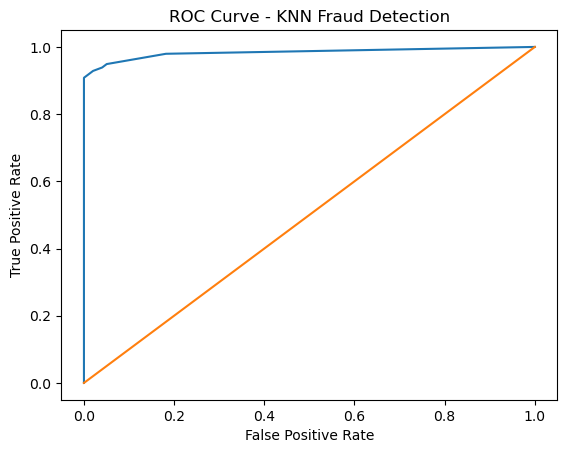

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN Fraud Detection")
plt.show()


In [38]:
k_values = range(1, 21)
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    
    report = classification_report(y_test, y_pred_k, output_dict=True)
    f1_scores.append(report['1']['f1-score'])


<Figure size 640x480 with 0 Axes>

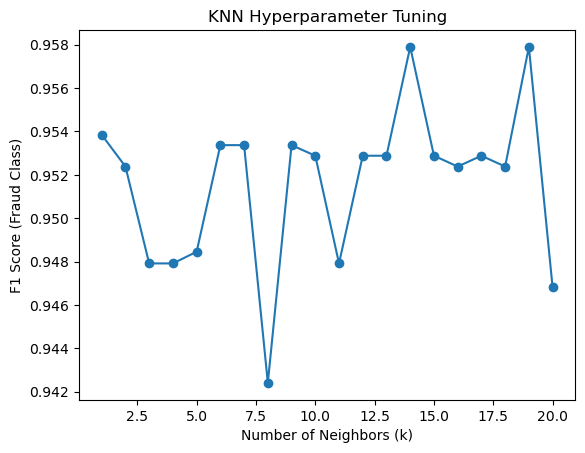

In [39]:
plt.figure()
plt.plot(k_values, f1_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Score (Fraud Class)")
plt.title("KNN Hyperparameter Tuning")
plt.show()


In [41]:
best_k = k_values[np.argmax(f1_scores)]
print("Best K:", best_k)

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)  

Best K: 14


KNeighborsClassifier(n_neighbors=14)